In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.determenistic = True

In [3]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

0it [00:00, ?it/s]

9920512it [00:01, 8796077.68it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 130875.30it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2141919.43it/s]                            
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 49198.36it/s]            


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
X_train = X_train.unsqueeze_(1).float()
X_test = X_test.unsqueeze_(1).float()

In [9]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [0]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
    self.act1 = torch.nn.Tanh()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
    self.act2 = torch.nn.Tanh()
    self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.fc1 = torch.nn.Linear(5*5*16, 120)
    self.act3 = torch.nn.Tanh()
    
    self.fc2 = torch.nn.Linear(120, 84)
    self.act4 = torch.nn.Tanh()
    
    self.fc3 = torch.nn.Linear(84, 10)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)
    
    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)
    
    x = x.view(x.size(0), x.size(1)* x.size(2)*x.size(3))
    
    x = self.fc1(x)
    x = self.act2(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)
    
    return x
  
lenet5 = LeNet5()

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
lenet5 = lenet5.to(device)

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [9]:
batch_size = 100

test_acc_hist = []
test_lost_hist = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()
    batch_indexes = order[start_index:start_index+batch_size]
    x_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)
    preds = lenet5.forward(x_batch)
    loss_val = loss(preds, y_batch)
    loss_val.backward()
    optimizer.step()
    

  test_preds = lenet5.forward(X_test)
  test_lost_hist.append(loss(test_preds, y_test).data.cpu())
  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
  test_acc_hist.append(accuracy)
  print(accuracy)

tensor(0.9785)
tensor(0.9818)
tensor(0.9858)
tensor(0.9884)
tensor(0.9884)
tensor(0.9862)
tensor(0.9879)
tensor(0.9870)
tensor(0.9874)
tensor(0.9876)
tensor(0.9879)
tensor(0.9881)
tensor(0.9889)
tensor(0.9885)
tensor(0.9893)
tensor(0.9880)
tensor(0.9886)
tensor(0.9878)
tensor(0.9879)
tensor(0.9895)
tensor(0.9885)
tensor(0.9889)
tensor(0.9866)
tensor(0.9886)
tensor(0.9894)
tensor(0.9897)
tensor(0.9881)
tensor(0.9896)
tensor(0.9895)
tensor(0.9898)
tensor(0.9882)
tensor(0.9885)
tensor(0.9900)
tensor(0.9882)
tensor(0.9873)
tensor(0.9890)
tensor(0.9899)
tensor(0.9900)
tensor(0.9868)
tensor(0.9894)
tensor(0.9895)
tensor(0.9873)
tensor(0.9881)
tensor(0.9883)
tensor(0.9893)


KeyboardInterrupt: ignored

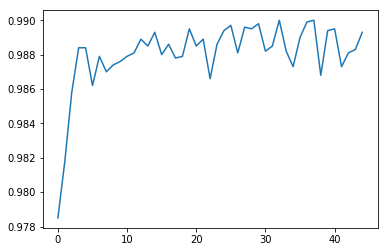

In [11]:
import matplotlib.pyplot as plt
plt.plot(test_acc_hist)